# Computational Methods For Finance Coursework

### Designing a financial derivative from a cryptocurrency

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si
import os

In [2]:
AVAX_data = yf.download("AVAX-USD", start="2021-03-01", end="2022-02-28") 

[*********************100%***********************]  1 of 1 completed


### Step - 1 Avalanche historical daily data download from Yahoo Finance

In [4]:
AVAX_data.tail() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,73.669731,79.316010,64.831413,76.523964,76.523964,3097306165
2022-02-25,76.537056,81.859871,72.947037,80.832619,80.832619,1884195969
2022-02-26,80.847862,84.872398,78.503708,81.879707,81.879707,1419135253
2022-02-27,81.793427,82.264816,73.751022,74.991188,74.991188,1577126485
2022-02-28,74.977539,85.394432,72.127090,84.339233,84.339233,1906636314


In [5]:
AVAX_data.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,23.877151,27.769768,23.697975,27.403772,27.403772,248201636
2021-03-02,27.420732,31.742144,26.015213,27.135157,27.135157,563934379
2021-03-03,27.148203,29.230932,26.619446,27.272078,27.272078,305240058
2021-03-04,27.266541,28.733620,24.280476,25.805176,25.805176,290696777
2021-03-05,25.781891,25.781891,23.620703,24.378054,24.378054,192065807


### Step 2 - Show crytocurrency movement using Logarithmic Return and Annualised Volatility

The Logarithmic return is one of the three methods for calculating the returns on an asset. it is calculated by taking the 
natural log of close price yesterday divided by close price today.

In [20]:
normal_return = []
for i in range(0,len(AVAX_data)-1):
    adjclose_yesterday = AVAX_data.iloc[i]['Adj Close']
    adjclose_today = AVAX_data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.009802143996273804,
 0.005045886810776151,
 -0.05378767994204676,
 -0.05530371612991731,
 0.022373546107575384]

In [22]:
log_return = []
for i in range(0,len(AVAX_data)-1):
    adjclose_yesterday = AVAX_data.iloc[i]['Adj Close']
    adjclose_today = AVAX_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.009850501272542996,
 0.005033198986905845,
 -0.05528829530554292,
 -0.05689179587617762,
 0.02212692999846055]

In [23]:
AVAX_datanr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = AVAX_datanr.mean() * len(AVAX_datanr)
nv = AVAX_datanr.std() * (len(AVAX_datanr) ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 2.31452676 and its annualized volatility is 1.54837871


In [24]:
AVAX_datalr = pd.DataFrame(log_return, columns = ['log']) 
lr = AVAX_datalr.mean() * len(AVAX_datalr)
lv = AVAX_datalr.std() * (len(AVAX_datalr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))

The annualized log return is 1.12416648 and its annualized volatility is 1.54473461


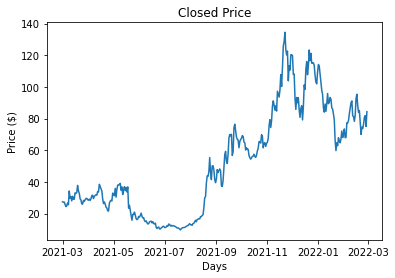

In [25]:
fig = plt.figure()
plt.plot(AVAX_data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

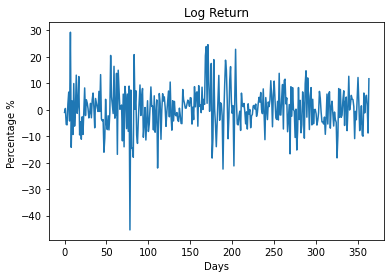

In [26]:
fig = plt.figure()
plt.plot(AVAX_datalr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

### Step 3 - Options Value Pricing Models

### Method 1 - Binomial Tree (CRR Tree) European Call Option

The Binomial Option Pricing Model(BOPM) approach is used to describe an underlying instrument over a period of time 
rather than a single point.The value computed at each stage is the value of the option at that specific point in time.

In [29]:
S0 = 97                 # spot stock price - the adj close price on 01/04/2022
K = 90                  # strike price
T = 0.25                # maturity 
r = 0.0166              # risk free rate - data collected from bloomberg on 01/04/2022 
sigma = 1.55            # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "call"         # payoff 

In [31]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [32]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [33]:
S

array([[ 97.        , 142.9094165 , 210.54743634, 310.19805436,
        457.01260771],
       [  0.        ,  65.83890852,  97.        , 142.9094165 ,
        210.54743634],
       [  0.        ,   0.        ,  44.68826676,  65.83890852,
         97.        ],
       [  0.        ,   0.        ,   0.        ,  30.33223409,
         44.68826676],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         20.58805346]])

In [34]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.40562573183029016

In [35]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        367.01260771],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        120.54743634],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          7.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [36]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 31.37350498,  62.67414088, 120.73399272, 220.29138094,
        367.01260771],
       [  0.        ,  10.06744057,  23.16113875,  53.00274308,
        120.54743634],
       [  0.        ,   0.        ,   1.14933829,   2.83643579,
          7.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [37]:
print('European ' + payoff + ' is', str( V[0,0]))

European call is 31.37350497984486


### Method 2 - Monte Carlo Simulation European Call Option

In [39]:
T = 0.25                  # maturity
r = 0.0166                # risk free rate
sigma = 1.55              # diffusion coefficient or volatility
S0 = 97                   # spot price
K = 90                    # strike 
m = 90                    # number of steps 
n = 1000                  # number of simulations 

In [40]:
def mcs_simulation_np(m,n):       #m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [41]:
S

array([[ 97.        , 142.9094165 , 210.54743634, 310.19805436,
        457.01260771],
       [  0.        ,  65.83890852,  97.        , 142.9094165 ,
        210.54743634],
       [  0.        ,   0.        ,  44.68826676,  65.83890852,
         97.        ],
       [  0.        ,   0.        ,   0.        ,  30.33223409,
         44.68826676],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         20.58805346]])

In [42]:
S = mcs_simulation_np(90,1000)

In [45]:
p = np.mean(np.maximum(S[-1,:] - K,0))
print('European call'+ ' is', str(p))


European call is 30.538800740190354


Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

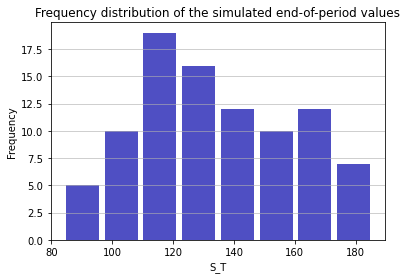

In [46]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

### Step 4 Greeks

In [48]:
from mpl_toolkits.mplot3d import Axes3D

### Surface of Delta

In [51]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [52]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.25, 2, 61)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

In [53]:
Delta

array([[0.44815428, 0.46216836, 0.4758541 , ..., 0.8660895 , 0.86901538,
        0.87186684],
       [0.46813559, 0.48145523, 0.49443969, ..., 0.86258021, 0.86539997,
        0.86815087],
       [0.48611513, 0.49881229, 0.51117208, ..., 0.86000123, 0.86271964,
        0.86537388],
       ...,
       [0.81782479, 0.82115935, 0.82436784, ..., 0.91172959, 0.91251122,
        0.91327957],
       [0.8203483 , 0.82362924, 0.82678602, ..., 0.9127315 , 0.91350076,
        0.91425696],
       [0.8228261 , 0.8260546 , 0.82916083, ..., 0.91372199, 0.91447914,
        0.91522345]])

C:\Users\darbu\AppData\Local\Temp/ipykernel_268/3356316328.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


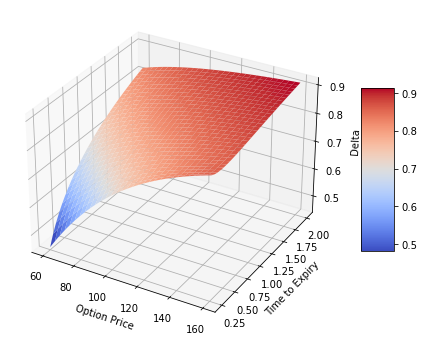

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Option Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [55]:
d = delta(97, 90, 0.25, 0.0166, 0, 1.55, 'call')
print('The value of Delta is', d.round(4),'.','If the underlying asset price increase (or decrease) by $1, then the value of the option will increase (or decrease) by  $', d.round(4), '.')

The value of Delta is 0.6878 . If the underlying asset price increase (or decrease) by $1, then the value of the option will increase (or decrease) by  $ 0.6878 .


### Surface of Gamma

In [57]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [58]:
S = np.linspace(60, 160, 61)
T = np.linspace(0.25, 2, 61)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

C:\Users\darbu\AppData\Local\Temp/ipykernel_268/610325388.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


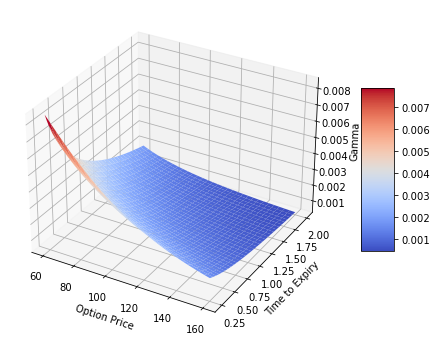

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Option Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [60]:
r = gamma(97, 90, 0.25, 0.0166, 0, 1.55, 'call')
print('The value of Gamma is', r.round(4),'.','If the price of gamma increase (or decrease), then the value of Delta will increase (or decrease)  ', r.round(4), '.')  

The value of Gamma is 0.0047 . If the price of gamma increase (or decrease), then the value of Delta will increase (or decrease)   0.0047 .


### Surface of Speed

In [61]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [62]:
S = np.linspace(60, 160, 41)
T = np.linspace(0.25, 2, 41)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

C:\Users\darbu\AppData\Local\Temp/ipykernel_268/2512296383.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


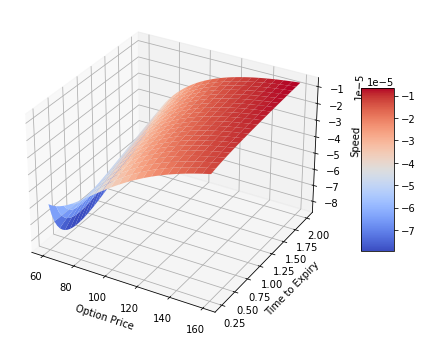

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Option Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [64]:
s = speed(97, 90, 0.25, 0.0166, 0, 1.55, 'call')
print('The value of Speed is', r.round(4),'.','If the value of Speed is positive (or negative), then the value of Gamma will increase (or decrease)  ', r.round(4), '.')

The value of Speed is 0.0047 . If the value of Speed is positive (or negative), then the value of Gamma will increase (or decrease)   0.0047 .


### Surface of Theta

In [65]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [66]:
S = np.linspace(60, 160, 41)
T = np.linspace(0.5, 2, 41)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

C:\Users\darbu\AppData\Local\Temp/ipykernel_268/3147503822.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


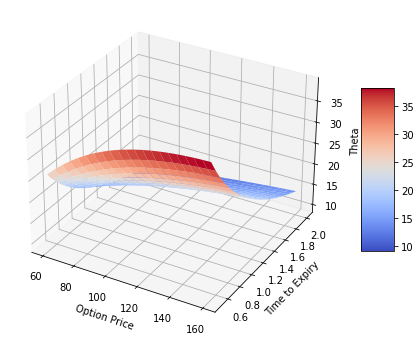

In [67]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Option Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [68]:
𝜃 = theta(97, 90, 0.25, 0.0166, 0, 1.55, 'call')
print('The value of Theta is', d.round(4),'.','If the time increase (or decrease) 1 day, then the value of the option will increase (or decrease)  $ ', d.round(4), '.') 

The value of Theta is 0.6878 . If the time increase (or decrease) 1 day, then the value of the option will increase (or decrease)  $  0.6878 .


### Surface of Rho

In [70]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [71]:
S = np.linspace(60, 160, 41)
T = np.linspace(0.5, 2, 41)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

In [72]:
S = np.linspace(60, 160, 41)
T = np.linspace(0.5, 2, 41)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

C:\Users\darbu\AppData\Local\Temp/ipykernel_268/1648160096.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


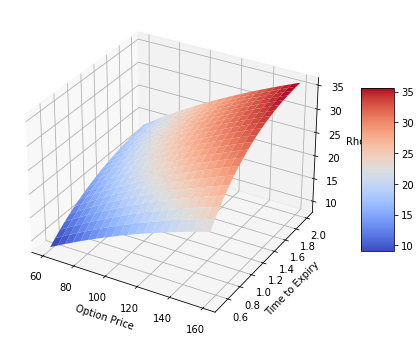

In [73]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Option Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [81]:
p = vega(97, 90, 0.25, 0.0166, 0, 1.55, 'call')
print('The value of Rho is', p.round(4),'.','If the interest rate increases 1%, then the value of the option will increase $', p.round(4)*0.01, '.')

The value of Rho is 17.1641 . If the interest rate increases 1%, then the value of the option will increase $ 0.17164100000000002 .


### Surface of Vega

In [77]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [78]:
S = np.linspace(60, 160, 41)
T = np.linspace(0.5, 2, 41)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 90, T[i], 0.0166, 0, 1.55, 'call')

C:\Users\darbu\AppData\Local\Temp/ipykernel_268/18111615.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


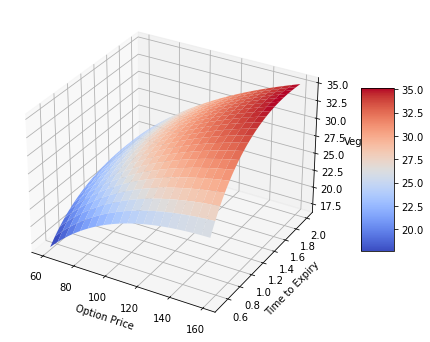

In [79]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Option Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [82]:
v = vega(97, 90, 0.25, 0.0166, 0, 1.55, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases by 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 17.1641 . If the volatility increases by 1%, then the value of the option will increase $ 0.17164100000000002 .
